# Практическая работа №1 
## Анализ данных мониторинга и моделирования для городов, пример №2
## Pandas и Numpy для работы с данными наблюдений

In [2]:
import glob
import os

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


#### Определеяем список файлов в директории

In [3]:
data_dir = 'PW1_data/example2/'

data_files = glob.glob(data_dir + '*.csv')
display(data_files)

['PW1_data/example2\\27417.csv',
 'PW1_data/example2\\27419.csv',
 'PW1_data/example2\\27428.csv',
 'PW1_data/example2\\27511.csv',
 'PW1_data/example2\\27523.csv',
 'PW1_data/example2\\27605.csv',
 'PW1_data/example2\\27606.csv',
 'PW1_data/example2\\27611.csv',
 'PW1_data/example2\\27618.csv',
 'PW1_data/example2\\27625.csv']

#### Читаем каждый файл как отдельный DataFrame

In [4]:
#Создаем пустой словарь
df4stations = {}

for file in data_files:
    st_id = str (os.path.basename (str (file)).split('.')[0])
    df4stations[st_id] = pd.read_csv(file, sep = ';')
    
    
    df4stations[st_id]['time'] = pd.to_datetime (df4stations[st_id]['time']).astype('datetime64[ns]') #, format="%Y-%m-%d %H%M%S")
    display(str (st_id) + ': ' + str (df4stations[st_id].shape))
    
    
    
    #Добавляем поле с идентификатором 
    df4stations[st_id]['id'] = st_id
    df4stations[st_id] = df4stations[st_id].set_index ('time')
    
    #display(df4stations[st_id].head())
    
    

'27417: (2921, 10)'

'27419: (2921, 10)'

'27428: (2921, 10)'

'27511: (2921, 10)'

'27523: (2921, 10)'

'27605: (2921, 10)'

'27606: (2921, 10)'

'27611: (2921, 10)'

'27618: (2921, 10)'

'27625: (2921, 10)'

In [13]:
df4stations[key]

,ta,rh,ps,psl,winds,windd,cltot,cllow,prec,id
time,,,,,,,,,,
2010-01-01 00:00:00,-11.0,92,989.5,1004.3,1,160,8,0,0.0,27625
2010-01-01 03:00:00,-11.8,94,990.1,1005.0,1,120,10,10,0.0,27625
2010-01-01 06:00:00,-11.7,94,990.7,1005.6,1,120,10,10,0.0,27625
2010-01-01 09:00:00,-10.4,93,991.1,1005.9,1,300,12,4,0.0,27625
2010-01-01 12:00:00,-8.8,83,991.0,1005.7,1,340,8,0,0.0,27625
...,...,...,...,...,...,...,...,...,...,...
2010-12-31 12:00:00,-9.5,73,1000.5,1015.4,3,210,5,0,0.0,27625
2010-12-31 15:00:00,-11.1,82,1001.4,1016.3,2,200,10,0,0.3,27625
2010-12-31 18:00:00,-9.9,82,1001.0,1015.9,2,180,10,0,0.0,27625


#### Объединяем данные по всем станциям в один большой DataFramе, способ №1

In [5]:
df_merged1 = pd.concat (df4stations.values()) #[df4stations[x] for x in df4stations.keys()])
display(df_merged1.shape)
display(df_merged1.head())



(29210, 10)

,ta,rh,ps,psl,winds,windd,cltot,cllow,prec,id
time,,,,,,,,,,
2010-01-01 00:00:00,-11.9,86,982.2,1003.9,0,0,9,0.0,0.0,27417
2010-01-01 03:00:00,-19.1,84,983.3,1005.7,0,0,3,0.0,0.2,27417
2010-01-01 06:00:00,-14.5,87,984.3,1006.3,0,0,10,10.0,0.0,27417
2010-01-01 09:00:00,-11.9,87,985.2,1007.0,0,0,12,4.0,0.0,27417
2010-01-01 12:00:00,-13.0,86,985.4,1007.2,1,40,9,0.0,0.0,27417


#### Объединяем данные по всем станциям в один большой DataFramе, способ №2

In [12]:
df_merged2 = pd.DataFrame()
for key in df4stations.keys():
    #df_merged2 = df_merged2.merge (df4stations[key].drop(columns=['id']), how = 'outer', right_index = True, left_index = True,
    #                               suffixes = (None,  '_' + str(key))) 
    
    df_merged2 = df_merged2.merge (df4stations[key].drop(columns = ['id']).rename(columns={c: c + '_' + str(key) for c in df4stations[key].columns}),
                                   how = 'outer', right_index = True, left_index = True)
    
display(df_merged2)
    


,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,-11.9,86,982.2,1003.9,0,0,9,0,0.0,-10.7,...,0.0,-11.0,92,989.5,1004.3,1,160,8,0,0.0
2010-01-01 03:00:00,-19.1,84,983.3,1005.7,0,0,3,0,0.2,-11.3,...,0.0,-11.8,94,990.1,1005.0,1,120,10,10,0.0
2010-01-01 06:00:00,-14.5,87,984.3,1006.3,0,0,10,10,0.0,-13.7,...,0.0,-11.7,94,990.7,1005.6,1,120,10,10,0.0
2010-01-01 09:00:00,-11.9,87,985.2,1007.0,0,0,12,4,0.0,-11.9,...,0.0,-10.4,93,991.1,1005.9,1,300,12,4,0.0
2010-01-01 12:00:00,-13.0,86,985.4,1007.2,1,40,9,0,0.0,-13.0,...,0.0,-8.8,83,991.0,1005.7,1,340,8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31 12:00:00,-11.0,82,989.8,1011.6,2,190,12,0,0.0,-11.4,...,0.0,-9.5,73,1000.5,1015.4,3,210,5,0,0.0
2010-12-31 15:00:00,-12.0,85,990.2,1012.1,2,180,10,0,0.2,-12.0,...,0.0,-11.1,82,1001.4,1016.3,2,200,10,0,0.3
2010-12-31 18:00:00,-11.6,85,989.9,1011.8,3,170,8,0,0.2,-12.5,...,0.2,-9.9,82,1001.0,1015.9,2,180,10,0,0.0


## Примеры работы с данными 
#### Построим графики температуры по всем станциям за самый жаркий день в истории Москвы (29 июня 2010 г.)


In [8]:

display(df_merged1.loc['2010-07-29':'2010-07-30'].head())
#df_merged2.loc['2010-07-29':'2010-07-30

display(df_merged2.loc['2010-07-29':'2010-07-30'].head())


,ta,rh,ps,psl,winds,windd,cltot,cllow,prec,id
time,,,,,,,,,,
2010-07-29 00:00:00,26.6,43,990.8,1009.8,1,120,4,0.0,0.0,27417
2010-07-29 03:00:00,26.0,44,989.9,1008.6,1,150,9,4.0,0.0,27417
2010-07-29 06:00:00,27.0,44,989.7,1008.5,1,160,8,4.0,0.0,27417
2010-07-29 09:00:00,34.4,28,989.0,1007.5,2,130,1,0.0,0.0,27417
2010-07-29 12:00:00,37.6,18,988.5,1006.8,4,180,8,0.0,0.0,27417


,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
2010-07-29 00:00:00,26.6,43,990.8,1009.8,1,120,4,0,0.0,26.8,...,0.0,21.3,59,998.5,1011.8,1,150,6,0,0.0
2010-07-29 03:00:00,26.0,44,989.9,1008.6,1,150,9,4,0.0,25.6,...,0.0,23.2,61,997.4,1010.4,0,0,8,0,0.0
2010-07-29 06:00:00,27.0,44,989.7,1008.5,1,160,8,4,0.0,28.1,...,0.0,28.2,40,997.3,1010.2,4,120,7,0,0.0
2010-07-29 09:00:00,34.4,28,989.0,1007.5,2,130,1,0,0.0,33.1,...,0.0,35.5,29,996.6,1009.1,4,130,8,3,0.0
2010-07-29 12:00:00,37.6,18,988.5,1006.8,4,180,8,0,0.0,37.5,...,0.0,38.4,19,995.7,1008.2,5,150,6,0,0.0


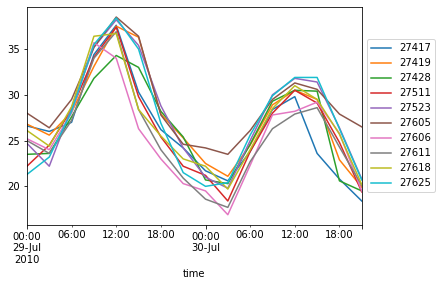

In [108]:
df_merged1.loc['2010-07-29':'2010-07-30'].pivot (columns='id', values='ta').plot ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [9]:
df_merged1.loc['2010-07-29':'2010-07-30'].pivot (columns='id', values='ta')

id,27417,27419,27428,27511,27523,27605,27606,27611,27618,27625
time,,,,,,,,,,
2010-07-29 00:00:00,26.6,26.8,23.5,22.2,24.7,28.0,25.2,25.0,26.1,21.3
2010-07-29 03:00:00,26.0,25.6,23.6,24.5,22.2,26.4,24.0,23.6,24.4,23.2
2010-07-29 06:00:00,27.0,28.1,27.6,28.4,28.6,29.5,28.0,27.2,28.7,28.2
2010-07-29 09:00:00,34.4,33.1,31.8,34.1,35.2,35.2,35.7,34.0,36.4,35.5
2010-07-29 12:00:00,37.6,37.5,34.3,37.4,38.2,38.5,34.0,36.9,36.7,38.4
2010-07-29 15:00:00,30.3,36.3,33.0,29.8,35.4,36.4,26.3,28.4,28.4,35.0
2010-07-29 18:00:00,26.2,27.9,28.2,25.4,28.8,27.8,23.0,24.0,25.5,26.9
2010-07-29 21:00:00,24.2,25.3,25.4,22.2,24.2,24.6,20.3,20.9,23.0,21.5
2010-07-30 00:00:00,21.7,22.5,20.7,21.2,21.0,24.2,19.5,18.6,22.2,20.0


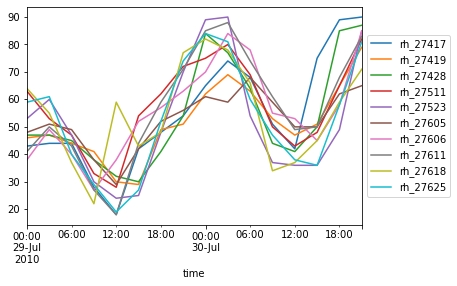

In [11]:
df_merged2.loc['2010-07-29':'2010-07-30', [c for c in df_merged2.columns if 'rh' in c]].plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Построим суточный ход по всем станциям за лето 2010 г.

,ta_27417,rh_27417,ps_27417,psl_27417,winds_27417,windd_27417,cltot_27417,cllow_27417,prec_27417,ta_27419,...,prec_27618,ta_27625,rh_27625,ps_27625,psl_27625,winds_27625,windd_27625,cltot_27625,cllow_27625,prec_27625
time,,,,,,,,,,,,,,,,,,,,,
0,15.874194,85.473118,994.332258,1014.086022,0.602151,66.774194,5.311828,2.698925,0.000000,17.083871,...,0.000000,16.170968,85.150538,1001.091398,1014.590323,0.634409,90.440860,6.935484,3.817204,0.000000
3,16.082796,86.247312,994.501075,1014.223656,0.731183,81.505376,6.397849,2.569892,0.491398,17.158065,...,0.336559,16.889247,85.344086,1001.304301,1014.773118,0.634409,80.107527,6.182796,3.064516,0.400000
6,21.113978,68.129032,994.596774,1013.984946,1.290323,128.602151,5.677419,2.806452,0.067742,21.226882,...,0.256989,22.065591,64.430108,1001.487097,1014.710753,1.634409,135.913978,6.365591,3.311828,0.154839
9,24.824731,53.860215,994.509677,1013.672043,1.677419,157.741935,6.225806,4.010753,0.000000,24.748387,...,0.000000,26.321505,47.849462,1001.329032,1014.361290,2.182796,169.139785,6.655914,4.129032,0.000000
12,25.996774,49.193548,994.160215,1013.249462,1.806452,157.956989,7.043011,4.645161,0.000000,26.131183,...,0.000000,27.643011,42.892473,1000.716129,1013.695699,2.462366,171.290323,6.838710,4.559140,0.000000
15,25.005376,53.258065,993.726882,1012.855914,1.602151,142.795699,6.763441,3.526882,1.089247,25.394624,...,0.793548,26.383871,47.258065,1000.108602,1013.134409,1.924731,163.333333,7.182796,4.365591,0.692473
18,20.505376,72.053763,993.919355,1013.323656,0.623656,65.053763,6.451613,2.741935,0.491398,21.588172,...,0.276344,21.958065,63.903226,1000.443011,1013.664516,1.021505,137.526882,6.784946,3.580645,0.327957
21,17.272043,81.881720,994.167742,1013.801075,0.537634,61.935484,5.408602,2.774194,0.000000,18.694624,...,0.000000,18.196774,77.935484,1000.881720,1014.288172,0.709677,96.881720,6.903226,4.021505,0.000000


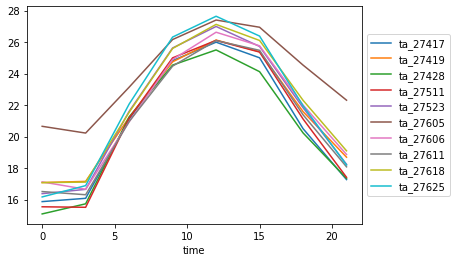

In [14]:
df_cr2 = df_merged2.loc['2010-06-01':'2010-09-01'].copy()

df_means = df_cr2.groupby(df_cr2.index.hour).mean()


display(df_means)
df_means[[c for c in df_merged2.columns if 'ta' in c]].plot ()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

id,27417,27419,27428,27511,27523,27605,27606,27611,27618,27625
time,,,,,,,,,,
0,15.874194,17.083871,15.092473,15.545161,16.378495,20.654839,17.123656,16.511828,17.079570,16.170968
3,16.082796,17.158065,15.733333,15.512903,16.651613,20.225806,16.655914,16.309677,17.111828,16.889247
6,21.113978,21.226882,21.247312,21.163441,21.602151,23.137634,20.936559,20.960215,21.546237,22.065591
9,24.824731,24.748387,24.541935,25.001075,25.627957,26.164516,24.897849,24.477419,25.596774,26.321505
12,25.996774,26.131183,25.504301,26.108602,26.993548,27.402151,26.629032,26.096774,27.125806,27.643011
15,25.005376,25.394624,24.123656,25.367742,25.725806,26.945161,25.765591,25.478495,26.105376,26.383871
18,20.505376,21.588172,20.235484,21.120430,21.833333,24.540860,22.003226,21.387097,22.306452,21.958065
21,17.272043,18.694624,17.349462,17.417204,18.240860,22.312903,18.866667,18.080645,19.097849,18.196774


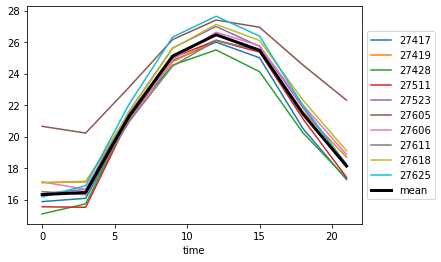

In [15]:
df_cr1 = df_merged1.loc['2010-06-01':'2010-09-01']

df_means_ta = df_cr1.pivot (columns='id', values='ta').groupby(df_cr2.index.hour).mean()
display(df_means_ta)

rural_mean = df_means_ta.loc[:,  [c for c in df_means_ta.columns if c != '27605']].mean(axis=1)

df_means_ta.plot ()
rural_mean.plot(color = 'black', linewidth = 3, label = 'mean')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
